# Task 2 - Multivariate Regression Implementation

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [87]:
df = pd.read_csv('data/cars.csv')
# Select features (independent variables)
X = df.drop(['Price in Thousands', 'Horsepower'], axis=1)

# Add a column of ones to the input for the bias term
X = np.insert(X, 0, 1, axis=1)

# Target variables (dependent variables)
Y = df[['Price in Thousands', 'Horsepower']].values

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Below we implemented Multivariant regression using gradient decsent . 

we used **CustomMultivariateRegression** class to do this . 

we defined a **learning rate** that controls the steps in calculating cost.

then we used **epoches** to iterate and train the theta parameter in every iteration.

then we used **regularization** (optimal) with **reg_param**. with this we can control the overfitting and underfitting. we used 2 options for regularization . lasso and ridge.

In [88]:
import numpy as np
from sklearn.preprocessing import StandardScaler

class CustomMultivariateRegression:
    def __init__(self, learning_rate, epochs, regularization=None, reg_param=0.1):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.regularization = regularization  # 'L1' or 'L2' or None
        self.reg_param = reg_param
        self.theta = None
        self.cost_history = []
        self.scaler = StandardScaler()

    def fit(self, X, Y):
        # Standardize the features
        X = self.scaler.fit_transform(X)

        # Add bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Initialize parameters
        self.theta = np.zeros((X_b.shape[1], Y.shape[1]))

        # Gradient descent
        for epoch in range(self.epochs):
            predictions = X_b.dot(self.theta)
            errors = predictions - Y

            # Calculate gradients
            gradient = X_b.T.dot(errors) / len(Y)

            # Regularization
            if self.regularization == 'L1':
                regularization_term = self.reg_param * np.sign(self.theta)
            elif self.regularization == 'L2':
                regularization_term = self.reg_param * self.theta
            else:
                regularization_term = 0

            # Update parameters
            self.theta -= self.learning_rate * (gradient + regularization_term)

            # Calculate and track cost
            cost = np.mean(np.sum(errors ** 2, axis=1)) / 2
            if self.regularization:
                cost += (self.reg_param / (2 * len(Y))) * np.sum(np.abs(self.theta)) if self.regularization == 'L1' else np.sum(self.theta ** 2)
            self.cost_history.append(cost)

    def predict(self, X):
        # Standardize the features using the same scaler as during training
        X = self.scaler.transform(X)
        # Add bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Predict using the learned parameters
        predictions = X_b.dot(self.theta)
        return predictions


**Testing different random states and see the r2_score of these different states**:

Here we have plot the performance of each random state. the lower the MSE the better the performance is . 

we can see that state = 42 has the best performance.

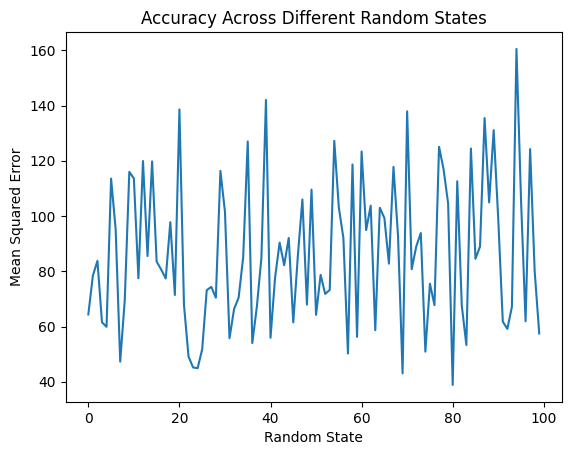

In [89]:

mse_list = []
for random_state in range(100):
    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)

    
    

    # Initialize and train the regression model
    regression_model = CustomMultivariateRegression(learning_rate=0.003, epochs=1000)
    regression_model.fit(X_train, Y_train)

    # Predict on the test set
    Y_pred = regression_model.predict(X_test)

    # Calculate Mean Squared Error for each target variable
    mse_price = mean_squared_error(Y_test[:, 0], Y_pred[:, 0])
    mse_hp = mean_squared_error(Y_test[:, 1], Y_pred[:, 1])

    mse_list.append((mse_price+mse_hp)/2)
    

# Plot the accuracy across different random states
plt.plot(range(100), mse_list, label='accuracy')

plt.xlabel('Random State')
plt.ylabel('Mean Squared Error')
plt.title('Accuracy Across Different Random States')

plt.show()

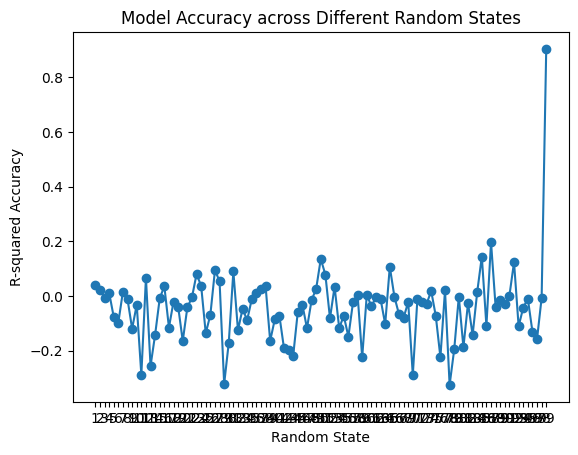

The highest R² score is 0.9040768002893216, achieved with random state 99.


In [90]:
best_r2 = -np.inf  # Start with the worst possible score
best_state = None
accuracies = []
random_states = range(1, 100)
for state in random_states:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=state)
    
    # Create a new instance of the model
    model = CustomMultivariateRegression(learning_rate=0.003, epochs=1000)
    
    # Train the model
    model.fit(X_train, Y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate R-squared accuracy
    accuracy_1 = r2_score(Y_test[:, 0], y_pred[:, 0])
    accuracy_2 = r2_score(Y_test[:, 1], y_pred[:, 1])
    accuracy = (accuracy_1+accuracy_2)/2
    accuracies.append(accuracy)
    if accuracy > best_r2:
        best_r2 = accuracy
        best_state = state

# Plot the accuracies across different random states
plt.plot(random_states, accuracies, marker='o')
plt.xlabel('Random State')
plt.ylabel('R-squared Accuracy')
plt.title('Model Accuracy across Different Random States')
plt.xticks(random_states)
plt.show()
print(f"The highest R² score is {best_r2}, achieved with random state {best_state}.")


here we plot the learning curve, which shows how the cost (or loss) decreases over the epochs as the model learns from the training data. The x-axis represents the number of epochs, and the y-axis represents the cost. 

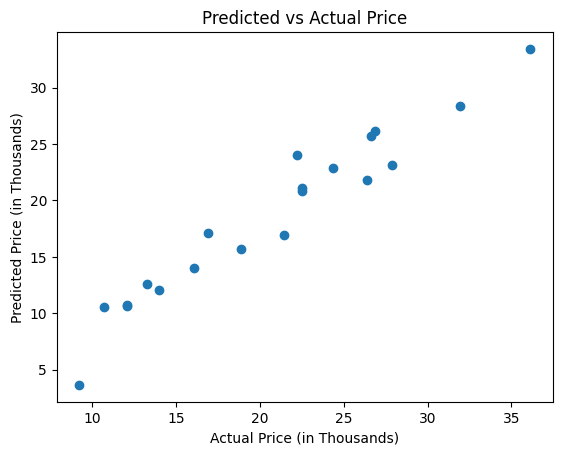

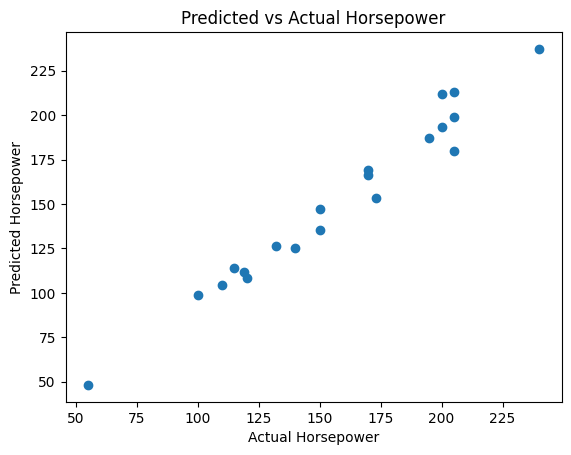

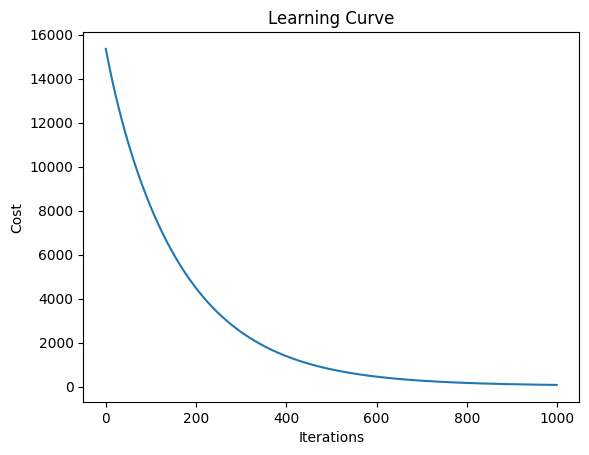

In [91]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=99)




# Initialize and train the regression model
regression_model_custom = CustomMultivariateRegression(learning_rate=0.003, epochs=1000)
regression_model_custom.fit(X_train, Y_train)

# Predict on the test set
Y_pred = regression_model_custom.predict(X_test)

# Visualize predicted vs actual values for Price
plt.scatter(Y_test[:, 0], Y_pred[:, 0])
plt.xlabel('Actual Price (in Thousands)')
plt.ylabel('Predicted Price (in Thousands)')
plt.title('Predicted vs Actual Price')
plt.show()

# Visualize predicted vs actual values for Horsepower
plt.scatter(Y_test[:, 1], Y_pred[:, 1])
plt.xlabel('Actual Horsepower')
plt.ylabel('Predicted Horsepower')
plt.title('Predicted vs Actual Horsepower')
plt.show()

# Plot the learning curve
plt.plot(range(len(regression_model_custom.cost_history)), regression_model_custom.cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Learning Curve')
plt.show()

The image shows the learning curve plot corresponding to the code. It starts with a high cost at epoch zero and shows a sharp decline in cost as the number of epochs increases. After approximately 800 epochs, the cost stabilizes close to zero, indicating that the model has learned from the data and the cost has converged.

In [92]:
# Final Cost Value
final_cost = regression_model_custom.cost_history[-1]
print(f"Final Cost Value: {final_cost}")


Final Cost Value: 74.85987837300088


In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error

def metrices(X_test, Y_test, model):
    # Make predictions on the test set
    Y_pred = model.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(Y_test[:, 0], Y_pred[:, 0]))
    print('Root Mean Squared Error_price (RMSE):', rmse)

    rmse = np.sqrt(mean_squared_error(Y_test[:, 1], Y_pred[:, 1]))
    print('Root Mean Squared Error_hp (RMSE):', rmse)

    # Calculate MAE
    mae = mean_absolute_error(Y_test[:, 0], Y_pred[:, 0])
    print('Mean Absolute Error_price (MAE):', mae)

    mae = mean_absolute_error(Y_test[:, 1], Y_pred[:, 1])
    print('Mean Absolute Error_hp (MAE):', mae)

    # Calculate R²
    r2_price = r2_score(Y_test[:, 0], Y_pred[:, 0])
    print('Coefficient of Determination_price (R^2):', r2_price)

    r2_hp = r2_score(Y_test[:, 1], Y_pred[:, 1])
    print('Coefficient of Determination_hp (R^2):', r2_hp)

    # Calculate MSE
    mse = mean_squared_error(Y_test[:, 0], Y_pred[:, 0])
    print(f"Mean Squared Error price (MSE): {mse}")

    mse = mean_squared_error(Y_test[:, 1], Y_pred[:, 1])
    print(f"Mean Squared Error(MSE) hp: {mse}")


    # Calculate Adjusted R^2
    n = len(Y[:, 0])  # Number of observations of price
    p = X.shape[1]  # Number of features

    adjusted_r2 = 1 - (1 - r2_price) * (n - 1) / (n - p - 1)
    print(f"Adjusted R-squared price: {adjusted_r2}")

    n = len(Y[:, 1])  # Number of observations of hp
    p = X.shape[1]  # Number of features
    adjusted_r2 = 1 - (1 - r2_price) * (n - 1) / (n - p - 1)
    print(f"Adjusted R-squared hp: {adjusted_r2}")

    

    explained_variance = explained_variance_score(Y_test[:, 0], Y_pred[:, 0])
    print(f"Explained Variance Score price: {explained_variance}")

    explained_variance = explained_variance_score(Y_test[:, 1], Y_pred[:, 1])
    print(f"Explained Variance Score hp: {explained_variance}")

    

    max_err = max_error(Y_test[:, 0], Y_pred[:, 0])
    print(f"Max Error price: {max_err}")

    max_err = max_error(Y_test[:, 0], Y_pred[:, 0])
    print(f"Max Error hp: {max_err}")

    

    msle = mean_squared_log_error(Y_test[:, 0], Y_pred[:, 0])
    print(f"Mean Squared Logarithmic Error price (MSLE): {msle}")

    msle = mean_squared_log_error(Y_test[:, 1], Y_pred[:, 1])
    print(f"Mean Squared Logarithmic Error hp (MSLE): {msle}")

    

    median_ae = median_absolute_error(Y_test[:, 0], Y_pred[:, 0])
    print(f"Median Absolute Error price: {median_ae}")

    median_ae = median_absolute_error(Y_test[:, 1], Y_pred[:, 1])
    print(f"Median Absolute Error hp: {median_ae}")






In [94]:
metrices(X_test, Y_test, regression_model_custom)

Root Mean Squared Error_price (RMSE): 2.725593142419795
Root Mean Squared Error_hp (RMSE): 10.368896839068627
Mean Absolute Error_price (MAE): 2.2356536014295685
Mean Absolute Error_hp (MAE): 8.248363476297705
Coefficient of Determination_price (R^2): 0.8606273654874227
Coefficient of Determination_hp (R^2): 0.9475262350912205
Mean Squared Error price (MSE): 7.428857978005814
Mean Squared Error(MSE) hp: 107.51402165924738
Adjusted R-squared price: 0.8395594091076145
Adjusted R-squared hp: 0.8395594091076145
Explained Variance Score price: 0.9377839876078965
Explained Variance Score hp: 0.9665723225441298
Max Error price: 5.591383082357846
Max Error hp: 5.591383082357846
Mean Squared Logarithmic Error price (MSLE): 0.04360606428723939
Mean Squared Logarithmic Error hp (MSLE): 0.004987727918457057
Median Absolute Error price: 1.7448672178776228
Median Absolute Error hp: 6.776201940100226


In [95]:
metrices(X_train, Y_train, regression_model_custom)

Root Mean Squared Error_price (RMSE): 2.1919384487409728
Root Mean Squared Error_hp (RMSE): 12.01773321654869
Mean Absolute Error_price (MAE): 1.6746241550461434
Mean Absolute Error_hp (MAE): 9.858401205640977
Coefficient of Determination_price (R^2): 0.888287003905523
Coefficient of Determination_hp (R^2): 0.915408189183617
Mean Squared Error price (MSE): 4.804594163068981
Mean Squared Error(MSE) hp: 144.42591166413771
Adjusted R-squared price: 0.8714001556586835
Adjusted R-squared hp: 0.8714001556586835
Explained Variance Score price: 0.9146398556264079
Explained Variance Score hp: 0.9564105658114248
Max Error price: 6.292045762395272
Max Error hp: 6.292045762395272
Mean Squared Logarithmic Error price (MSLE): 0.009849876747786781
Mean Squared Logarithmic Error hp (MSLE): 0.005436529607501582
Median Absolute Error price: 1.1970872922319202
Median Absolute Error hp: 8.718332935546762


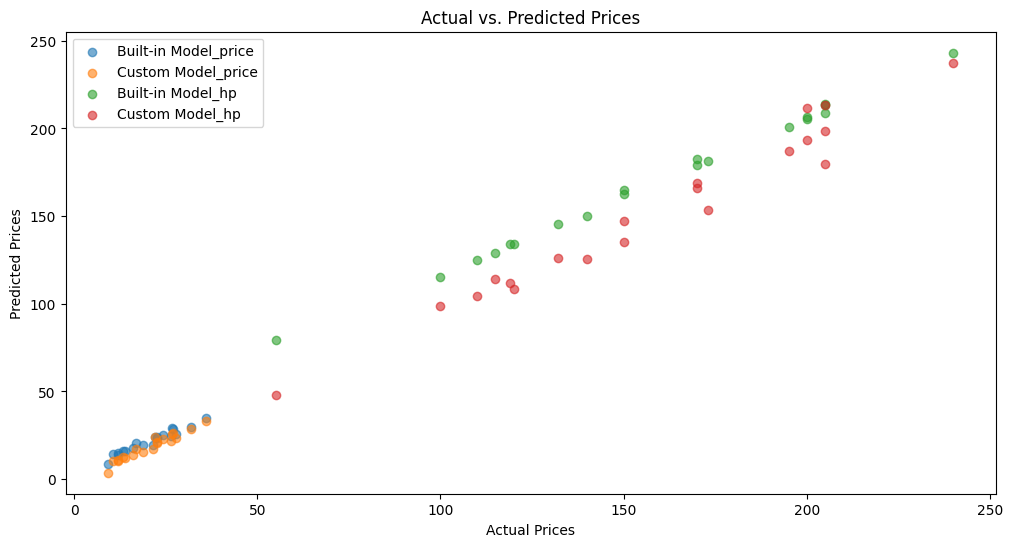

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Assume your custom-implemented function's model is called 'custom_model'
# Use the custom model to predict on the test set
Y_pred_c = regression_model_custom.predict(X_test)



# Create an instance of LinearRegression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
built_in_model = LinearRegression()


# Train the model using the training data
built_in_model.fit(X_train, Y_train)

# Make predictions on the test set using the built-in model
Y_pred_b = built_in_model.predict(X_test)


plt.figure(figsize=(12, 6))

# Built-in model
plt.scatter(Y_test[:,0], Y_pred_b[:,0], alpha=0.6, label='Built-in Model_price')
# Custom model
plt.scatter(Y_test[:,0], Y_pred_c[:,0], alpha=0.6, label='Custom Model_price')

# Built-in model
plt.scatter(Y_test[:,1], Y_pred_b[:,1], alpha=0.6, label='Built-in Model_hp')
# Custom model
plt.scatter(Y_test[:,1], Y_pred_c[:,1], alpha=0.6, label='Custom Model_hp')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()




In [97]:
# Create an instance of LinearRegression
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the linear regression model
built_in_model = LinearRegression()
built_in_model.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred = built_in_model.predict(X_test_scaled)

# Calculate Mean Squared Error for each target variable
mse_price = r2_score(Y_test[:,0], Y_pred[:, 0])
mse_hp = r2_score(Y_test[:,1], Y_pred[:, 1])

print("r2 Squared for Price in Thousands:", mse_price)
print("r2 Squared for Horsepower:", mse_hp)


r2 Squared for Price in Thousands: 0.917648121676315
r2 Squared for Horsepower: 0.9977010548714961


# Task 3 - Manual K-Fold Cross Validation Implementation

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error

def metrices(X_test, Y_test, model):
    # Make predictions on the test set
    Y_pred = model.predict(X_test)

    # Calculate metrics
    rmse_price = np.sqrt(mean_squared_error(Y_test[:, 0], Y_pred[:, 0]))
    rmse_hp = np.sqrt(mean_squared_error(Y_test[:, 1], Y_pred[:, 1]))
    mae_price = mean_absolute_error(Y_test[:, 0], Y_pred[:, 0])
    mae_hp = mean_absolute_error(Y_test[:, 1], Y_pred[:, 1])
    r2_price = r2_score(Y_test[:, 0], Y_pred[:, 0])
    r2_hp = r2_score(Y_test[:, 1], Y_pred[:, 1])
    mse_price = mean_squared_error(Y_test[:, 0], Y_pred[:, 0])
    mse_hp = mean_squared_error(Y_test[:, 1], Y_pred[:, 1])

    # Create a string containing all the metrics
    metrics_str = f"Root Mean Squared Error_price (RMSE): {rmse_price:.4f}\n"
    metrics_str += f"Root Mean Squared Error_hp (RMSE): {rmse_hp:.4f}\n"
    metrics_str += f"Mean Absolute Error_price (MAE): {mae_price:.4f}\n"
    metrics_str += f"Mean Absolute Error_hp (MAE): {mae_hp:.4f}\n"
    metrics_str += f"Coefficient of Determination_price (R^2): {r2_price:.4f}\n"
    metrics_str += f"Coefficient of Determination_hp (R^2): {r2_hp:.4f}\n"
    metrics_str += f"Mean Squared Error_price (MSE): {mse_price:.4f}\n"
    metrics_str += f"Mean Squared Error_hp (MSE): {mse_hp:.4f}\n"

    return metrics_str

In [99]:
k = 5

In [100]:
import numpy as np
from sklearn.model_selection import KFold

class CustomKFoldCV:
    def __init__(self, model, k=5, random_state=None):
        self.model = model
        self.k = k
        self.random_state = random_state
        self.learning_curves = []
        self.validation_metrics = []

    def fit(self, X, y):
        kf = KFold(n_splits=self.k, shuffle=True, random_state=self.random_state)
        for train_idx, val_idx in kf.split(X):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]

            self.model.fit(X_train, y_train)
            y_pred = self.model.predict(X_val)

            # Calculate and store the learning curve
            errors = y_pred - y_val
            cost = np.mean(np.sum(errors ** 2, axis=1)) / 2
            self.learning_curves.append(cost)

            # Calculate and store validation metrics (e.g., RMSE, R^2)
            fold_metrics = metrices(X_val, y_val, self.model)
            self.validation_metrics.append(fold_metrics)

    def plot_learning_curve(self):
        plt.plot(range(len(self.learning_curves)), self.learning_curves)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Learning Curve')
        plt.show()

    def print_validation_metrics(self):
        for i, metrics in enumerate(self.validation_metrics):
            print(f"Fold {i+1} Metrics:")
            print(metrics)
            print("-" * 30)

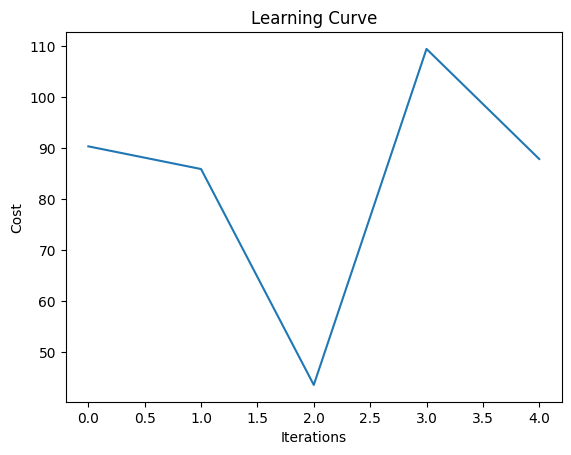

Fold 1 Metrics:
Root Mean Squared Error_price (RMSE): 2.3477
Root Mean Squared Error_hp (RMSE): 13.2367
Mean Absolute Error_price (MAE): 1.7961
Mean Absolute Error_hp (MAE): 10.9702
Coefficient of Determination_price (R^2): 0.8772
Coefficient of Determination_hp (R^2): 0.9084
Mean Squared Error_price (MSE): 5.5119
Mean Squared Error_hp (MSE): 175.2099

------------------------------
Fold 2 Metrics:
Root Mean Squared Error_price (RMSE): 2.9094
Root Mean Squared Error_hp (RMSE): 12.7817
Mean Absolute Error_price (MAE): 2.2464
Mean Absolute Error_hp (MAE): 10.8249
Coefficient of Determination_price (R^2): 0.7995
Coefficient of Determination_hp (R^2): 0.9131
Mean Squared Error_price (MSE): 8.4646
Mean Squared Error_hp (MSE): 163.3712

------------------------------
Fold 3 Metrics:
Root Mean Squared Error_price (RMSE): 3.0919
Root Mean Squared Error_hp (RMSE): 8.8132
Mean Absolute Error_price (MAE): 2.4034
Mean Absolute Error_hp (MAE): 7.2568
Coefficient of Determination_price (R^2): 0.7909

In [101]:
model = CustomMultivariateRegression(learning_rate=0.003, epochs=1000)
kfold_cv = CustomKFoldCV(model=model, k=5, random_state=42)
kfold_cv.fit(X, Y)
kfold_cv.plot_learning_curve()
kfold_cv.print_validation_metrics()

# Task 4 - Comparison with Built-in Python Libraries

In [102]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Custom functions from previous implementation
def prepare_data(df, target_column1, target_column2, dropped_features=[]):
    X = df.drop(columns=[target_column1, target_column2] + dropped_features)
    y1 = df[target_column1]
    y2 = df[target_column2]
    return X, y1, y2

def calc_accuracy(y_test, y_pred, target_column, X_test):
    r2 = r2_score(y_test, y_pred)
    accuracy = {
        'target': target_column,
        'MSE':  mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2_score': r2,
        'Adjusted_R2_score': 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - len(X_test.columns) - 1)
    }
    return accuracy


In [103]:
def plot_actual_vs_predicted(y1_test, y1_pred, y2_test, y2_pred, target_columns):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(y1_test, y1_pred, color='blue')
    plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {target_columns[0]}')

    plt.subplot(1, 2, 2)
    plt.scatter(y2_test, y2_pred, color='red')
    plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {target_columns[1]}')

    plt.tight_layout()
    plt.show()

In [104]:

def plot_accuracy_statistics(accuracy_target1, accuracy_target2, fold_label, k, show_graph=True):
    mse_target1 = [fold['MSE'] for fold in accuracy_target1]
    mse_target2 = [fold['MSE'] for fold in accuracy_target2]

    rmse_target1 = [fold['RMSE'] for fold in accuracy_target1]
    rmse_target2 = [fold['RMSE'] for fold in accuracy_target2]

    mae_target1 = [fold['MAE'] for fold in accuracy_target1]
    mae_target2 = [fold['MAE'] for fold in accuracy_target2]

    r2_target1 = [fold['R2_score'] for fold in accuracy_target1]
    r2_target2 = [fold['R2_score'] for fold in accuracy_target2]

    fold_labels = [fold_label + ' ' + str(i+1) for i in range(k)]

    if show_graph:
        plt.figure(figsize=(12, 6))

        plt.subplot(2, 2, 1)
        plt.plot(fold_labels, mse_target1, marker='o', linestyle='-')
        plt.xlabel('Fold')
        plt.ylabel('MSE')
        plt.title('MSE for Target 1')

        plt.subplot(2, 2, 2)
        plt.plot(fold_labels, mse_target2, marker='o', linestyle='-')
        plt.xlabel('Fold')
        plt.ylabel('MSE')
        plt.title('MSE for Target 2')

        plt.subplot(2, 2, 3)
        plt.plot(fold_labels, rmse_target1, marker='o', linestyle='-')
        plt.xlabel('Fold')
        plt.ylabel('RMSE')
        plt.title('RMSE for Target 1')

        plt.subplot(2, 2, 4)
        plt.plot(fold_labels, rmse_target2, marker='o', linestyle='-')
        plt.xlabel('Fold')
        plt.ylabel('RMSE')
        plt.title('RMSE for Target 2')

        plt.tight_layout()
        plt.show()

In [105]:
def run_sklearn_cross_validation(target_column1, target_column2, df, k=5, dropped_features=[]):
    kf = KFold(n_splits=k, shuffle=True)
    X, y1, y2 = prepare_data(df, target_column1, target_column2, dropped_features)
    model = LinearRegression()
    accuracy_target1, accuracy_target2 = [], []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]
        y2_train, y2_test = y2.iloc[train_index], y2.iloc[test_index]
        model.fit(X_train, np.column_stack((y1_train, y2_train)))
        y1_pred, y2_pred = model.predict(X_test).T
        accuracy_target1.append(calc_accuracy(y1_test, y1_pred, target_column1, X_test))
        accuracy_target2.append(calc_accuracy(y2_test, y2_pred, target_column2, X_test))
    return accuracy_target1, accuracy_target2



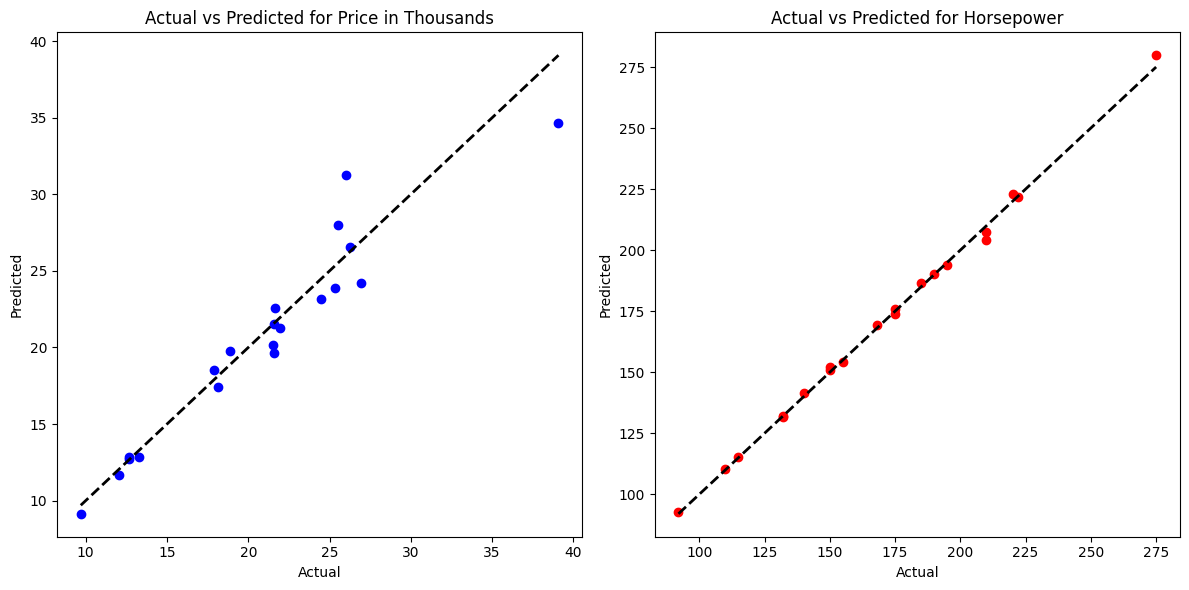

Metrics for sklearn regression:
For Target 1:
{'target': 'Price in Thousands', 'MSE': 3.696765667257581, 'RMSE': 1.9226974975948714, 'MAE': 1.3380901047670488, 'R2_score': 0.9176481216763176, 'Adjusted_R2_score': 0.7764734731214334}

For Target 2:
{'target': 'Horsepower', 'MSE': 4.397301547183977, 'RMSE': 2.0969743792388065, 'MAE': 1.4593770843144689, 'R2_score': 0.9977010548714956, 'Adjusted_R2_score': 0.9937600060797739}
Fold 1:
For Target 1:
{'target': 'Price in Thousands', 'MSE': 5.910238305802613, 'RMSE': 2.4310981686889184, 'MAE': 1.6683405607226127, 'R2_score': 0.8273786666596054, 'Adjusted_R2_score': 0.5314563809332146}

For Target 2:
{'target': 'Horsepower', 'MSE': 7.030226580178905, 'RMSE': 2.65145744453478, 'MAE': 1.8195620617196, 'R2_score': 0.996446616772551, 'Adjusted_R2_score': 0.9903551026683527}
-------------------------
Fold 2:
For Target 1:
{'target': 'Price in Thousands', 'MSE': 5.053225016396655, 'RMSE': 2.247937947630373, 'MAE': 1.7430446524399514, 'R2_score': 0.9

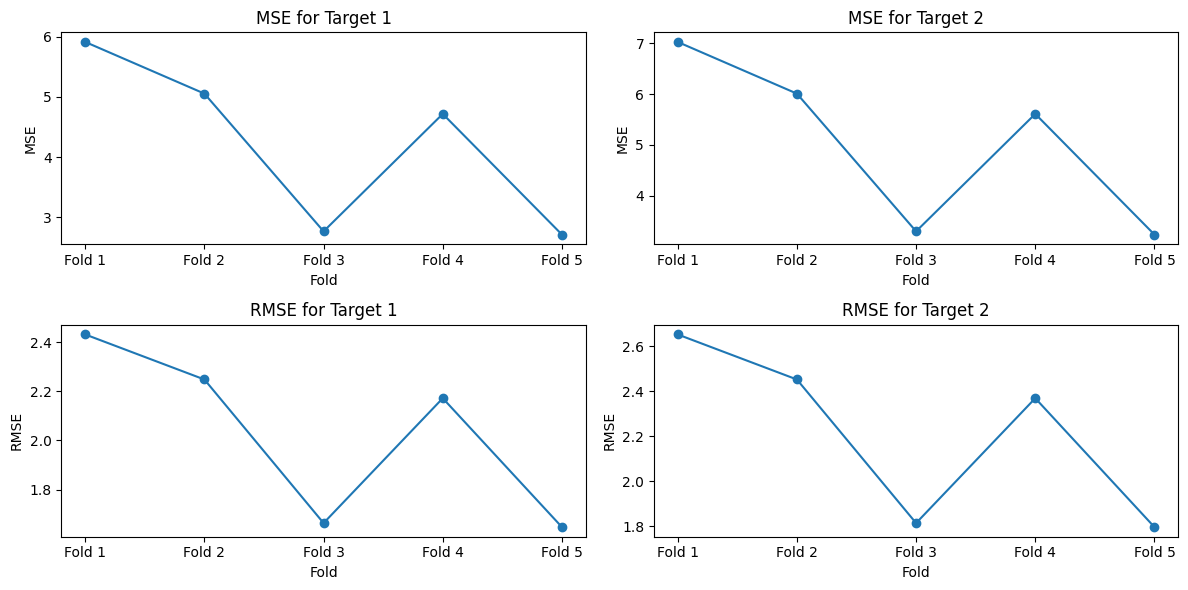

Fold 1:
For Target 1:
{'target': 'Price in Thousands', 'MSE': 7.878098753225298, 'RMSE': 2.8067951035345096, 'MAE': 2.04516544330437, 'R2_score': 0.8098559502780783, 'Adjusted_R2_score': 0.4838947221833555}

For Target 2:
{'target': 'Price in Thousands', 'MSE': 2.5364727375014406, 'RMSE': 1.5926307599382352, 'MAE': 1.2567598328530778, 'R2_score': 0.8933186132648412, 'Adjusted_R2_score': 0.7104362360045688}
-------------------------
Fold 2:
For Target 1:
{'target': 'Horsepower', 'MSE': 9.370995909448409, 'RMSE': 3.061208243398088, 'MAE': 2.230543051818779, 'R2_score': 0.994597876614982, 'Adjusted_R2_score': 0.9853370936692368}

For Target 2:
{'target': 'Horsepower', 'MSE': 3.0171334681784536, 'RMSE': 1.7369897720419811, 'MAE': 1.3706748803373692, 'R2_score': 0.9978644714459631, 'Adjusted_R2_score': 0.9942035653533285}
-------------------------


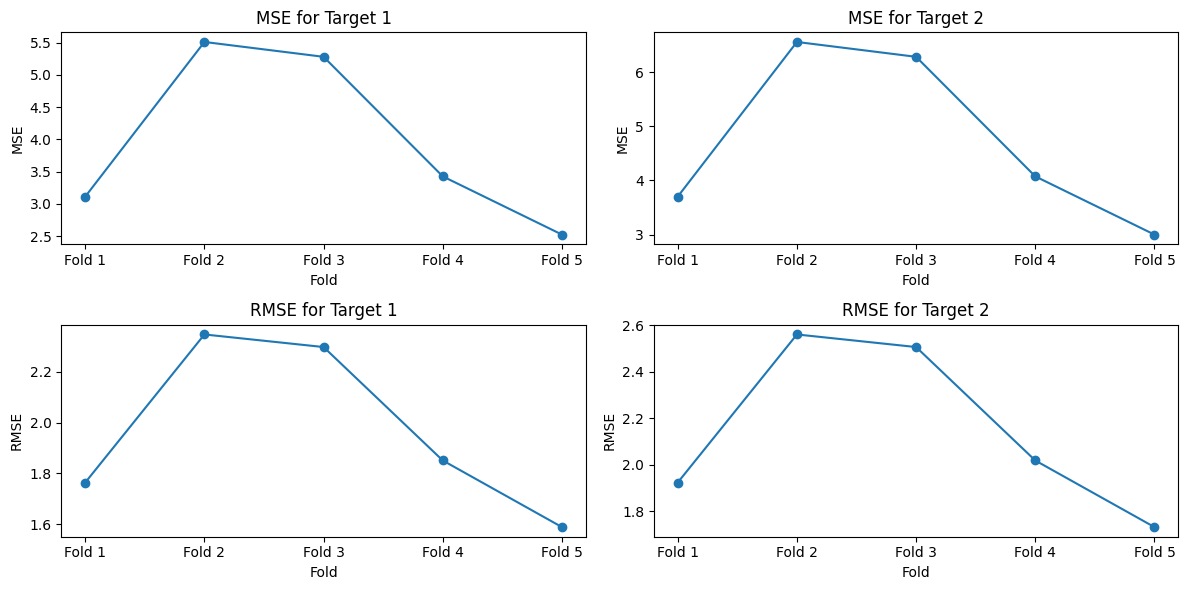

In [106]:
k = 5
regression_sklearn, metrics_sklearn1, metrics_sklearn2 = run_sklearn_regression(df, 'Price in Thousands', 'Horsepower')
print("Metrics for sklearn regression:")
print("For Target 1:")
print(metrics_sklearn1)
print("\nFor Target 2:")
print(metrics_sklearn2)

k = 5
metrics_cv_sklearn_target1, metrics_cv_sklearn_target2 = run_sklearn_cross_validation('Price in Thousands', 'Horsepower', df, k=5)

# Print metrics for each fold
for i in range(k):
    print(f"Fold {i+1}:")
    print("For Target 1:")
    print(metrics_cv_sklearn_target1[i])
    print("\nFor Target 2:")
    print(metrics_cv_sklearn_target2[i])
    print("-------------------------")

plot_accuracy_statistics(metrics_cv_sklearn_target1, metrics_cv_sklearn_target2, 'Fold', k)

metrics_cv_sklearn = run_sklearn_cross_validation('Price in Thousands', 'Horsepower', df, k=5)

# Print metrics for each fold
for i, metrics_fold in enumerate(metrics_cv_sklearn):
    print(f"Fold {i+1}:")
    print("For Target 1:")
    print(metrics_fold[0])
    print("\nFor Target 2:")
    print(metrics_fold[1])
    print("-------------------------")

accuracy_target1, accuracy_target2 = run_sklearn_cross_validation('Price in Thousands', 'Horsepower', df, k=5)
plot_accuracy_statistics(accuracy_target1, accuracy_target2, 'Fold', k)


# Questions

## Question 1

Dealing with missing values involves careful consideration. One common approach is imputation, where missing values are filled in with estimated ones based on the available data. This could be done using statistical measures such as mean, median, or mode depending on the data distribution. For categorical features, encoding techniques like one-hot encoding or label encoding are employed to transform them into numerical values that machine learning models can process effectively. When it comes to feature selection, the choice is driven by the aim to maximize predictive power while minimizing complexity. Metrics like correlation, feature importance scores from ensemble methods like random forests, or domain knowledge can guide this process, ensuring that only the most relevant features are retained, thus enhancing model performance and interpretability.

## Question 2

The decision to opt for classification over regression when predicting whether a shot results in a goal stems from the nature of the problem. While regression is suitable for predicting continuous outcomes, such as house prices or temperatures, classification is better suited for outcomes that fall into distinct categories, like whether a shot results in a goal or not. Algorithms such as logistic regression, decision trees, or random forests are adept at handling such categorical outcomes, providing probabilities or class labels indicating the likelihood of a shot resulting in a goal. Thus, classification algorithms are more appropriate for this scenario, offering better interpretability and performance.

## Question 3

To ensure the accuracy of the shot angle formula used in preprocessing, rigorous validation steps are necessary. Implementing the formula and comparing its results against manually calculated angles for a variety of test cases is a crucial initial step. Additionally, leveraging real-world data with recorded angles can provide empirical validation. Visualizing shot locations and angles on a pitch diagram offers insights into the reasonableness of calculated angles. It's vital to handle edge cases, like shots from extreme positions, accurately. Consulting domain experts or relevant literature can provide additional validation and insights, ensuring the formula's accuracy and reliability.

## Question 4

K-fold cross-validation offers several advantages, including robust performance estimation, efficient data utilization, and simplicity. However, it has its limitations. It can be computationally expensive, especially with large datasets or complex models. Moreover, it assumes data homogeneity across folds, which might not always hold true. Alternative methods like stratified k-fold, leave-one-out, leave-p-out, repeated k-fold, and time-series cross-validation address some of these limitations. For instance, stratified k-fold ensures class balance in each fold, while time-series cross-validation respects temporal dependencies in data. Each method has its strengths and weaknesses, making careful selection imperative based on the specific dataset and modeling goals.

## Question 5

**Mean Squared Error (MSE):** MSE measures the average of the squares of the errors between the actual and predicted values. It’s useful for emphasizing larger errors due to the squaring part. 

$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$


**Root Mean Squared Error (RMSE)**:RMSE is the square root of MSE and represents the standard deviation of the residuals. It can be more interpretable than MSE as it’s in the same units as the target variable.

$$ \text{RMSE} = \sqrt{\text{MSE}} $$


**Mean Absolute Error (MAE):** MAE measures the average of the absolute differences between the actual and predicted values. It gives a linear score that doesn’t overly penalize large deviations unlike MSE.

$$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$


**R-squared (R²):** R² indicates the proportion of variance in the dependent variable that is predictable from the independent variables. It’s a measure of how well the model’s predictions match the actual data.

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$


**Adjusted R-squared:** Adjusted R² adjusts the R² for the number of predictors in the model, which is useful when comparing models with different numbers of predictors.

$$ \text{Adjusted R}^2 = 1 - \left(\frac{(1 - R^2)(n - 1)}{n - p - 1}\right) $$


**Explained Variance Score:** This metric measures the proportion of variance in the dependent variable that is explained by the model. A score of 1 indicates perfect prediction.

$$ \text{Explained Variance Score} = 1 - \frac{\text{Var}(y - \hat{y})}{\text{Var}(y)} $$


**Max Error Code:** Max Error measures the largest single error between the predicted and actual values. It’s useful for identifying the worst-case error of the model.

$$ \text{Max Error} = \max(|y_i - \hat{y}_i|) $$


**Mean Squared Logarithmic Error (MSLE) Code:** 

MSLE is useful when you want to penalize underestimates more than overestimates. It’s particularly good for models where the target has exponential growth.

$$ \text{MSLE} = \frac{1}{n} \sum_{i=1}^{n} (\log(y_i + 1) - \log(\hat{y}_i + 1))^2 $$


**Median Absolute Error Code:** This metric is robust to outliers and represents the median of the absolute differences between the predictions and the actual values.

$$ \text{Median Absolute Error} = \text{median}(|y_i - \hat{y}_i|) $$


In [107]:
model = regression_model_custom
metrices(X_test, Y_test, model)

'Root Mean Squared Error_price (RMSE): 2.2024\nRoot Mean Squared Error_hp (RMSE): 11.5814\nMean Absolute Error_price (MAE): 1.7844\nMean Absolute Error_hp (MAE): 9.5114\nCoefficient of Determination_price (R^2): 0.8919\nCoefficient of Determination_hp (R^2): 0.9299\nMean Squared Error_price (MSE): 4.8507\nMean Squared Error_hp (MSE): 134.1283\n'

In [108]:
model = built_in_model
metrices(X_test_scaled, Y_test, model)

'Root Mean Squared Error_price (RMSE): 1.9227\nRoot Mean Squared Error_hp (RMSE): 2.0970\nMean Absolute Error_price (MAE): 1.3381\nMean Absolute Error_hp (MAE): 1.4594\nCoefficient of Determination_price (R^2): 0.9176\nCoefficient of Determination_hp (R^2): 0.9977\nMean Squared Error_price (MSE): 3.6968\nMean Squared Error_hp (MSE): 4.3973\n'

In [109]:
len(Y[:,0])

100